# Hedonmeter vs Word2vec

This work is to compare word ranking generated by crowdsourcing and word ranking generated by concept vector.  For the comparison of the two rankings, I will use [Spearman's rho correlational coefficients](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).

- Date: 12/02/2015
- Author: Deok Gun Park


## Hedonmeter
Link: http://hedonometer.org/index.html

### Example Data
word  |	happiness_rank	| happiness_average	| happiness_standard_deviation	| twitter_rank | 	google_rank |	nyt_rank |	lyrics_rank
-----|----------------|----------|------------|-------------|-------|---------|----------|
laughter	| 1 |	8.50	| 0.9313	| 3600	| --	| --	| 1728
happiness	| 2 |	8.44	| 0.9723	| 1853	| 2458	| --	| 1230
love	| 3 |	8.42	| 1.1082	| 25	| 317	| 328	| 23

## Glove
Link: http://nlp.stanford.edu/projects/glove/


### 1. Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cPickle
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr
%matplotlib inline

### 2. Load Dataset 

#### Parameters

In [36]:
# Location of required dataset
hedonFileName = './data/hedonmeter.TXT'
w2vModelFileName = './data/glove.twitter.27B.200d.txt'


In [37]:
hedon = pd.read_csv(hedonFileName, sep='\t', header=0, skiprows=3)
w2vModel = pd.read_csv(w2vModelFileName, delim_whitespace=True, quoting=3, header=None, skiprows=0)
w2vModel = w2vModel.rename(columns={0:'word'})
w2vLabel = w2vModel['word'].tolist()

# w2vLabel = open(w2vLabelFileName).read().split('\n')
# w2vLabel = [w.rstrip() for w in w2vLabel ]

# #There is an error. It reads additional blank line. So remove here. 
# w2vLabel.pop()

# w2vModel = pd.read_csv(w2vModelFileName, sep='\t', header=None)

# #There is an error.  It reads one additional dimension. So remove here. 
# w2vModel = w2vModel.drop(300,1)

# w2vModel['word'] = pd.Series(w2vLabel, index=w2vModel.index)

In [35]:
# a = w2vModel['word']
# b = a.tolist()
# print b[0:10]
# w2vModel.head(30)

['<user>', '.', ':', 'rt', ',', '<repeat>', '<hashtag>', '<number>', '<url>', '!']


,word,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,<user>,0.315530,0.537650,0.101770,0.032553,0.003798,0.015364,-0.203440,0.33294,-0.20886,...,-0.062927,0.266740,-0.236170,0.181090,-0.265830,0.090904,-0.812050,-0.456640,-0.465400,0.520660
1,.,0.351320,0.000561,-0.214880,-0.047070,-0.177770,0.661620,-0.007481,-0.15963,-0.22129,...,-0.443700,0.141860,-0.424750,0.023551,-0.096965,0.079513,-1.468300,0.036684,-0.037206,0.853840
2,:,0.807670,0.497860,0.082696,-0.007930,0.082471,-0.593600,-0.187530,0.48645,0.10719,...,-0.155520,0.111860,0.068971,-0.550480,-0.500100,0.188600,-0.856310,-0.073302,-0.477850,0.670590
3,rt,0.556870,0.632840,-0.156090,0.263970,0.280150,-0.365060,-0.121280,0.45217,-0.16123,...,-0.306690,-0.154380,-0.198570,0.064394,-0.143460,-0.105240,-0.572530,0.238570,-0.792350,0.237610
4,",",0.392700,-0.084181,-0.607500,0.323100,-0.359190,0.626640,0.297580,-0.21039,-0.23201,...,-0.618590,-0.320790,-0.251190,0.278930,0.257740,-0.466150,-0.489120,0.093868,-0.585060,0.195440
5,<repeat>,0.483650,0.074092,0.035808,0.183700,-0.005551,0.494600,0.191340,0.03439,0.12400,...,-0.196630,0.050388,-0.475580,-0.234340,-0.110460,0.148240,-1.496800,-0.266570,-0.169710,1.057900
6,<hashtag>,-0.053786,-0.815620,0.302790,-0.826580,-0.089303,0.444060,0.220770,-0.19696,-0.12741,...,-0.484040,-0.423440,-0.026859,-0.013458,-0.655010,0.027362,-0.716350,-1.171700,-0.349010,1.403400
7,<number>,0.341410,-0.034142,0.164300,-0.111490,0.149070,0.526410,-0.550420,0.35677,0.07617,...,0.339910,-0.206100,-0.368210,0.073563,-0.812500,0.345310,-0.557620,0.314830,0.042309,1.208400
8,<url>,-0.104830,-0.270610,0.195520,-0.512620,-0.333620,-0.598090,-0.502220,0.00018,-0.12967,...,-0.058285,-0.263540,-0.141120,-0.440690,-0.224580,0.105140,-0.396180,-0.519960,-0.896410,1.309000
9,!,0.554470,-0.142650,-0.003774,-0.317230,-0.384100,0.401700,0.550580,0.19051,0.28973,...,0.041454,0.149400,-0.262710,-0.568180,-0.304670,0.208480,-1.222600,-0.282800,-0.069286,1.227100


### 3. Find common words between two sets

In [39]:
# Iterate over hedon words and 
# If there is a same word in word2vec
# Add to the common words list 

common_words = []
hedon_words = hedon['word'].tolist()

counter = 0
for w in hedon_words:
    if w in w2vLabel:
        common_words.append(w)
    else:
#         print w
        counter += 1

print 'Common words generated.'
print str(counter) + ' words were skipped'

Common words generated.
280 words were skipped


In [40]:
print w2vLabel[0:100]

['<user>', '.', ':', 'rt', ',', '<repeat>', '<hashtag>', '<number>', '<url>', '!', 'i', 'a', '"', 'the', '?', 'you', 'to', '(', '<allcaps>', '<elong>', ')', 'me', 'de', '<smile>', '\xef\xbc\x81', 'que', 'and', '\xe3\x80\x82', '-', 'my', 'no', '\xe3\x80\x81', 'is', 'it', '\xe2\x80\xa6', 'in', 'n', 'for', '/', 'of', 'la', "'s", '*', 'do', "n't", 'that', 'on', 'y', "'", 'e', 'o', 'u', 'en', 'this', 'el', 'so', 'be', "'m", 'with', 'just', '>', 'your', '^', 'like', 'have', 'te', 'at', '\xef\xbc\x9f', 'love', 'se', 'are', '<', 'm', 'r', 'if', 'all', 'b', '\xe3\x83\xbb', 'not', 'but', 'we', 'es', 'ya', '&', 'follow', 'up', 'what', 'get', 'lol', 'un', '\xe2\x99\xa5', 'lo', 'when', 'was', '\xe2\x80\x9c', '\xe2\x80\x9d', 'one', 'por', 'si', 'out']


### 4. Get Ranking for the Word2Vec

Here the **common_words** represents ranking in the hedon ranking.  So we need to calculate the ranking for the word2vec case. To do this, 
1. We will filter w2vModel by the common_words
2. We will generate concept vector
    - by the single word {happy, sad}
    - by the group of words that were at the beginning 100 words and bottom 100 words
3. We will calculate the cosine similarity between concept vector and normal vector
4. We will sort and get the new ranking


#### Parameters

In [46]:
# Parameters

groupSize = 1000 
dimSize = 200
positive_term = 'happy'
negative_term = 'sad'

In [42]:
# 1. We will filter w2vModel by the common_words
# Remove w2vModel to save some memory
if 'w2vModel' in locals():
    filteredW2vModel = w2vModel[w2vModel['word'].isin(common_words)]
    del w2vModel



In [43]:
'w2vModel' in locals()

False

In [44]:
# 2. We will generate concept vector for both single and group
# First we will do single case
positive_terms = [positive_term]
negative_terms = [negative_term]

positive_terms_models = filteredW2vModel[filteredW2vModel['word'].isin(positive_terms)].mean()[0:dimSize]
negative_terms_models = filteredW2vModel[filteredW2vModel['word'].isin(negative_terms)].mean()[0:dimSize]

concept_vector_single = positive_terms_models - negative_terms_models

#Then we will do group case
positive_terms = common_words[0:groupSize]
negative_terms = common_words[-1*groupSize:]

positive_terms_models = filteredW2vModel[filteredW2vModel['word'].isin(positive_terms)].mean()[0:dimSize]
negative_terms_models = filteredW2vModel[filteredW2vModel['word'].isin(negative_terms)].mean()[0:dimSize]

concept_vector_group = positive_terms_models - negative_terms_models


In [51]:
filteredW2vModel.iloc[0, 1:201]

1        0.55687
2        0.63284
3       -0.15609
4        0.26397
5        0.28015
6       -0.36506
7       -0.12128
8        0.45217
9       -0.16123
10      0.015791
11       0.49511
12      0.054643
13       0.66865
14       0.44101
15      -0.48446
16       0.12594
17       0.40596
18     -0.086889
19       -0.2352
20    -0.0073657
21       0.58835
22      -0.12101
23      -0.11671
24      -0.47415
25       0.47753
26       -1.3069
27      -0.42765
28    -0.0055401
29        0.2247
30      0.061141
         ...    
171     -0.22463
172     -0.46903
173     -0.20435
174     -0.13256
175     -0.73335
176     -0.42302
177      0.14038
178      0.59022
179     -0.28843
180     -0.09194
181      0.18957
182     0.039595
183     -0.11694
184      0.67706
185     -0.23313
186    -0.079736
187     -0.46375
188    -0.054137
189       0.0557
190     -0.12069
191     -0.30669
192     -0.15438
193     -0.19857
194     0.064394
195     -0.14346
196     -0.10524
197     -0.57253
198      0.238

In [52]:
# 3. We will calculate the dot product between concept vector and normal vector

filteredW2vModel['cosine_similarity_single'] = np.array([ cosine(filteredW2vModel.iloc[i,1:dimSize+1], concept_vector_single) for i in range(len(filteredW2vModel)) ])
filteredW2vModel['cosine_similarity_group'] = np.array([ cosine(filteredW2vModel.iloc[i,1:dimSize+1], concept_vector_group) for i in range(len(filteredW2vModel)) ])
filteredW2vModel.head()

,word,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,cosine_similarity_single,cosine_similarity_group
3,rt,0.556870,0.63284,-0.156090,0.263970,0.28015,-0.36506,-0.121280,0.452170,-0.161230,...,-0.19857,0.064394,-0.14346,-0.10524,-0.572530,0.23857,-0.79235,0.237610,0.897390,0.796021
10,i,0.056404,0.49536,0.184390,0.054535,-0.51751,0.13517,-0.028431,-0.289410,-0.369370,...,-0.10937,-0.234360,-0.75368,0.27098,-0.205150,0.63598,-0.18880,-0.035558,0.989746,0.821172
11,a,0.149310,0.27889,0.089979,0.408820,-0.21328,0.15406,-0.025642,-0.645150,-0.716430,...,0.49654,-0.186880,0.57106,-0.40908,-0.040246,-0.44821,0.31604,-0.493650,0.926800,0.800659
13,the,0.493500,0.35698,0.660680,-0.032975,0.24989,0.25936,-0.027169,0.068403,-0.290630,...,0.11233,0.160400,-0.17142,-0.15621,-0.113660,0.17706,-0.53695,-0.296990,0.931660,0.794074
15,you,0.196400,0.67153,0.006298,0.253590,-0.42097,0.38490,1.037800,-0.185360,-0.054244,...,-0.18500,-0.196530,0.10566,-0.26214,0.203970,-0.30815,-0.12312,0.048926,0.853682,0.779904


In [53]:
# 4. We will sort and get the new ranking
filteredW2vModel.sort_values(by='cosine_similarity_single', inplace=True)
filteredW2vModel['single_ranking'] = np.array([i+1 for i in range(len(filteredW2vModel))])

filteredW2vModel.sort_values(by='cosine_similarity_group', inplace=True)
filteredW2vModel['group_ranking'] = np.array([i+1 for i in range(len(filteredW2vModel))])
filteredW2vModel.head()

,word,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,cosine_similarity_single,cosine_similarity_group,single_ranking,group_ranking
2644,wonderful,0.235820,-0.328560,-0.141060,0.22165,0.120260,-0.182750,1.08140,-0.104600,-0.227770,...,0.389790,0.514830,0.106360,-0.289090,-0.061064,-0.793020,0.844845,0.478315,187,1
1830,lovely,0.001012,-0.622420,-0.433260,0.27455,-0.285920,-0.155850,0.74151,-0.162610,0.008385,...,0.572760,0.071839,-0.165720,-0.659930,-0.378610,-0.421660,0.801258,0.496280,61,2
1954,gift,-0.220780,-0.054201,0.115480,0.44740,0.913880,-0.494260,0.98520,0.481850,0.320930,...,0.052972,1.393100,0.214150,-0.134300,0.524390,0.311140,0.794221,0.504377,52,3
4110,fantastic,0.061631,-0.081371,-0.157100,0.16271,-0.183180,-0.010724,1.09930,-0.040084,0.034191,...,0.132550,-0.195570,0.029497,-0.179130,-0.246020,-0.278390,0.862533,0.507282,297,4
565,amazing,0.095532,0.144910,0.098987,0.22079,0.034644,0.030568,0.75508,-0.003296,-0.048291,...,0.035607,0.079106,0.023921,-0.020831,-0.225440,0.055548,0.900281,0.514191,704,5


### 5. Calculate Spearman's rho

In [54]:
rankings = pd.DataFrame(common_words, columns=['word'])
rankings['hedon'] = np.array([i+1 for i in range(len(rankings))])
rankings['single_ranking'] = np.array([filteredW2vModel[filteredW2vModel.word == w].single_ranking.values[0] for w in common_words  ])
rankings['group_ranking'] = np.array([filteredW2vModel[filteredW2vModel.word == w].group_ranking.values[0] for w in common_words  ])

In [55]:
print 'Single ranking:\t' + str( spearmanr(rankings['hedon'], rankings['single_ranking']))
print 'Group ranking:\t' + str( spearmanr(rankings['hedon'], rankings['group_ranking']))


Single ranking:	SpearmanrResult(correlation=0.26103263409561656, pvalue=1.4565490240906875e-154)
Group ranking:	SpearmanrResult(correlation=0.51574845708934935, pvalue=0.0)


/Users/intuinno/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


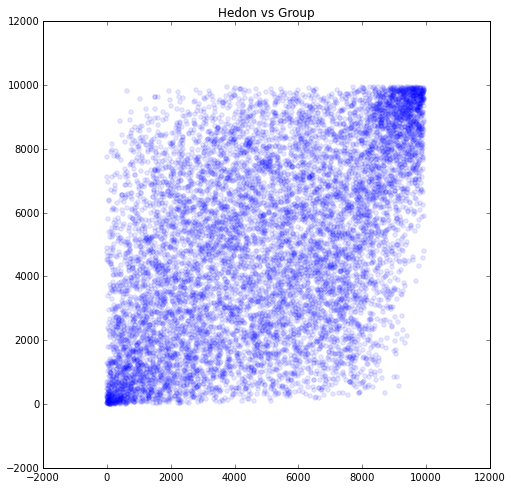

In [56]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, title="Hedon vs Group")
ax.scatter(rankings['hedon'], rankings['group_ranking'], color="blue", alpha=0.1)


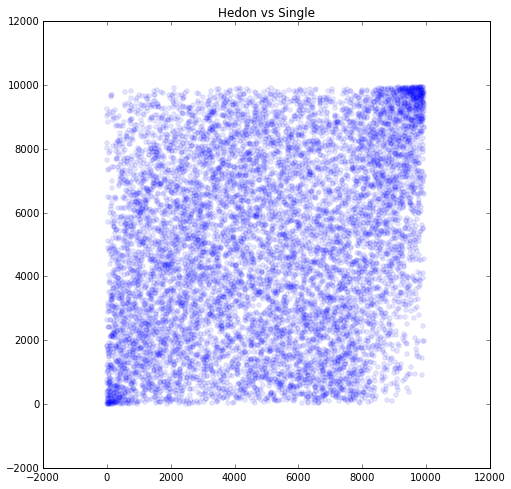

In [57]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, title="Hedon vs Single")
ax.scatter(rankings['hedon'], rankings['single_ranking'], color="blue", alpha=0.1)


In [ ]:
filteredW2vModel = filteredW2vModel.drop('single_ranking',1)


In [ ]:
filteredW2vModel